In [3]:
# 공통코드
import numpy as np
import pandas as pd
#시각화 패키지
import matplotlib.pyplot as plt
#시각화에서 한글을 사용하기 위한 설정
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
#시각화에서 음수를 표현하기 위한 설정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3
# precision은 소수점은 과학적 표기법으로 변환할 자릿수를 설정
# 아래와 같이 하면 소수점 셋째 자리 밑으로는 과학적 표기법으로 표시
pd.options.display.precision = 3

import seaborn as sns
import scipy as sp
import scipy.stats

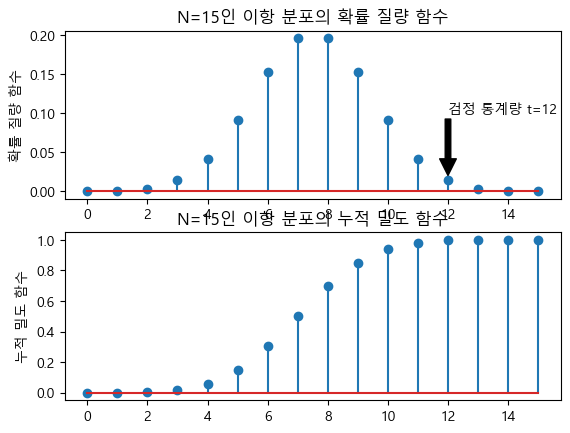

0.03515625


In [7]:
# 시행 횟수
N = 15
# 앞면이 나올 확률
mu = 0.5

# 이항 분포를 생성
rv = sp.stats.binom(N, mu)

xx = np.arange(N+1)
# 확률 질량 함수를 출력
# 확률 질량 함수 : 각각이 나올 수 있는 확률에 대한 함수
plt.subplot(211)
plt.stem(xx, rv.pmf(xx))
plt.ylabel("확률 질량 함수")
plt.title("N=15인 이항 분포의 확률 질량 함수")
plt.annotate('검정 통계량 t=12', xy=(12,0.02), xytext=(12,0.1),
            arrowprops={"facecolor":"black"})
#12번이 나올 확률
#print(rv.pmf(12-1))

plt.subplot(212)
# 누적 밀도 함수
plt.stem(xx, rv.cdf(xx))
plt.ylabel("누적 밀도 함수")
plt.title("N=15인 이항 분포의 누적 밀도 함수")
plt.show()

# 유의 확률
x = 2 *(1-rv.cdf(12-1))
print(x) # 0.035


In [12]:
# tdata.csv 파일의 성적을 읽어서 평균이 75점이라고 할 수 있는지 유의 수준 5%로 검정
items = pd.read_csv('./data/data/data/tdata.csv', encoding='cp949')
# print(items)
# 성적의 평균이 75라고 했을 때의 유의 확률
result = sp.stats.ttest_1samp(items['성적'], popmean=75).pvalue
print(result)
if result >= 0.05 :
    print("유의 확률이 유의 수준보다 크므로 귀무가설을 채택")
    print("평균은 75라고 할 수 있습니다.")
else :
    print("유의 확률이 유의 수준보다 작으므로 귀무가설을 기각")
    print("평균은 75라고 할 수 없습니다.")    
    

    

0.5079049500571382
유의 확률이 유의 수준보다 크므로 귀무가설을 채택
평균은 75라고 할 수 있습니다.


C:\Users\USER\AppData\Local\Temp\ipykernel_3960\3438289481.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집단")
C:\Users\USER\AppData\Local\Temp\ipykernel_3960\3438289481.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x2, kde=F

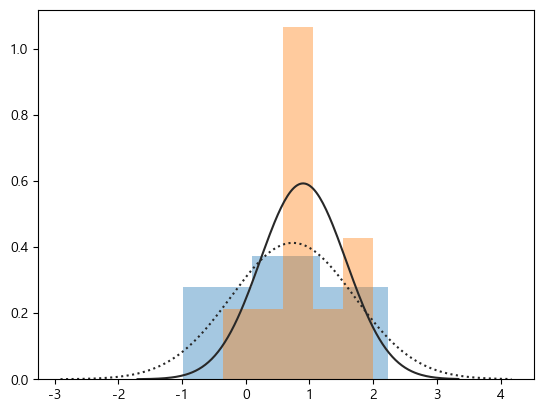

Ttest_indResult(statistic=-0.4139968526988655, pvalue=0.6843504889824326)


In [16]:
# 제 2종 오류 발생

# 첫 번째 데이터 집단
N_1 = 10
mu_1 = 0
sigma_1 = 1

# 두 번째 데이터 집단(평균 다르게 설정)
N_2 = 10
mu_2 = 0.5
sigma_2 = 1

# 데이터 생성
np.random.seed(0) # 시드 고정
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
#print(x1)
#print(x2)
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집단")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label="2번 데이터 집단")
ax.lines[0].set_linestyle(":")
plt.show()

print(sp.stats.ttest_ind(x1,x2, equal_var=False))
# 유의확률 pvalue=0.6843504889824326
# 유의수준을 얼마로 지정하더라도 귀무 가설을 기각할 수 없음
# 분명히 평균이 0과 0.5로 다른데도 두 집단의 평균이 같다라는 유의 확률이 0.684
# 귀무가설이 거짓인데 참이라고 나왔음
# 이런 경우는 제 2종 오류라고 하며 원인은 대부분 데이터 개수의 부족


C:\Users\USER\AppData\Local\Temp\ipykernel_3960\3870548318.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집단")
C:\Users\USER\AppData\Local\Temp\ipykernel_3960\3870548318.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x2, kde=F

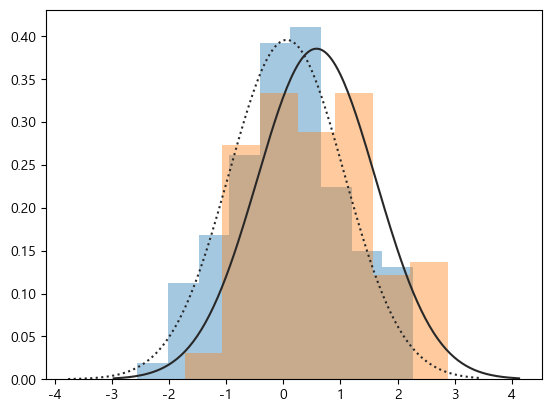

Ttest_indResult(statistic=-3.597192759749613, pvalue=0.00040634222594880954)


In [17]:
# 제 2종 오류 제거_데이터 갯수 늘리기(10개 -> 100개)

# 첫 번째 데이터 집단
N_1 = 100
mu_1 = 0
sigma_1 = 1

# 두 번째 데이터 집단(평균 다르게 설정)
N_2 = 100
mu_2 = 0.5
sigma_2 = 1

# 데이터 생성
np.random.seed(0) # 시드 고정
x1 = sp.stats.norm(mu_1, sigma_1).rvs(N_1)
x2 = sp.stats.norm(mu_2, sigma_2).rvs(N_2)
#print(x1)
#print(x2)
ax = sns.distplot(x1, kde=False, fit=sp.stats.norm, label="1번 데이터 집단")
ax = sns.distplot(x2, kde=False, fit=sp.stats.norm, label="2번 데이터 집단")
ax.lines[0].set_linestyle(":")
plt.show()

print(sp.stats.ttest_ind(x1,x2, equal_var=False))
# 유의확률 pvalue=0.00040634222594880954


In [19]:
# 서로 다른 수면제를 복용한 경우 약의 효과가 다른지 여부를 판단 - 유의수준 5%
# p-value가 0.05보다 크면 귀무가설 채택 - 2개의 평균은 같다
# p-value가 0.05보다 작으면 귀무가설 기각 - 2개의 평균은 다르다

x1 = np.array([0.7, -1.6, -0.2, -1.2, -0.1, 3.4, 3.7, 0.8, 0.0, 2.0])
x2 = np.array([1.9, 0.8, 1.1, 0.1, -0.1, 4.5, 5.5, 1.6, 4.6, 3.4])

r = sp.stats.ttest_ind(x1, x2, equal_var=True)
#print(r)

if r.pvalue >= 0.05 :
    print("귀무 가설을 채택 : 2개의 평균은 같다")
else :
    print("귀무 가설을 기각 : 2개의 평균은 다르다")
    


귀무 가설을 채택 : 2개의 평균은 같다


In [20]:
#동일한 집단에게 수면제1과 수면제2를 복용했을 때 수면시간의 변화
x1 = np.array([0.7, -1.6, -0.2, -1.2, -0.1, 3.4, 3.7, 0.8, 0.0, 2.0])
x2 = np.array([1.9, 0.8, 1.1, 0.1, -0.1, 4.5, 5.5, 1.6, 4.6, 3.4])

r = sp.stats.ttest_rel(x1, x2)
print(r)



TtestResult(statistic=-4.103994576711355, pvalue=0.002660774200843549, df=9)


In [27]:
# 윌콕슨의 부호 순위 검정
training_rel=pd.read_csv('./data/data/data/training_rel.csv')
#print(training_rel.head())

# 데이터 6개 복제
toy_df = training_rel[:6].copy()

# 2개 데이터의 차이를 구하기
toy_df['차'] = toy_df['후']-toy_df['전']
#print(toy_df)

# 차의 절대 값을 가지고 순위를 구하기
toy_df['순위'] = sp.stats.rankdata(abs(toy_df['차'])).astype(int)
print(toy_df)

# 차이가 음수 일 때와 양수 일 때의 순위 합을 구하기
r_minus = np.sum((toy_df['차']<0)*toy_df['순위'])
r_plus = np.sum((toy_df['차']>0)*toy_df['순위'])
print(r_minus, r_plus)

# 2개의 값 중 작은 쪽이 검정 통계량 : 8
# 이 값과 분석 임계값(직접 설정한 값)과 비교해서
# 임계값보다 작은 경우에 귀무 가설이 기각되는 단측 검정




    전   후   차  순위
0  59  41 -18   5
1  52  63  11   3
2  55  68  13   4
3  61  59  -2   1
4  59  84  25   6
5  45  37  -8   2
8 13


In [28]:
data = [41,30,51,71,61]
# 카이 제곱 검정을 수행
print(sp.stats.chisquare(data))
# 유의 수준을 5%로 설정하면 유의 수준이 유희 확률보다 크기 때문에
# 선호도의 차이가 있다로 해석(귀무 가설 채택)
# pvalue=0.00039991784008227264
# 평균을 가지고 하는 검정과 분산을 가지고 하는 검정은 결과 해석을 반대로 함



Power_divergenceResult(statistic=20.488188976377952, pvalue=0.00039991784008227264)


In [34]:
# 붓꽃 데이터 가져오기
# sklearn의 데이터는 data 속성에 feature가 존재하고 target에 target이 존재
from sklearn.datasets import load_iris

iris = load_iris()

# 벡터는 하나의 행 - vector
# 가로 방향이건 세로 방향이건 여러 개의 스칼라 데이터가 모이면 벡터
# 여러 개의 데이터 묶음에서 하나의 데이터를 선택한 경우를 특징 벡터(feature vector)
print(iris.data[0,:])

# 스칼라 - 하나의 값
print(iris.data[0,0])

# sklearn에서는 벡터를 대입할 때 열 개수가 1개인 2차원 배열 객체를 대입해야 함
x1 = np.array([5.1, 3.5, 1.4, 0.2]) # 보통의 경우 벡터
print(x1)
# sklearn에서는 위의 경우 아래처럼 생성해서 대입
x1 = np.array([[5.1], [3.5], [1.4], [0.2]]) # sklearn에서의 벡터
print(x1)

[5.1 3.5 1.4 0.2]
5.1
[5.1 3.5 1.4 0.2]
[[5.1]
 [3.5]
 [1.4]
 [0.2]]


(8, 8)


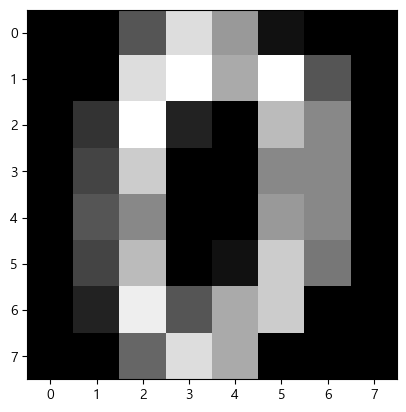

C:\Users\USER\AppData\Local\Temp\ipykernel_3960\4032393454.py:10: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  img_rgb = misc.face()


(768, 1024, 3)


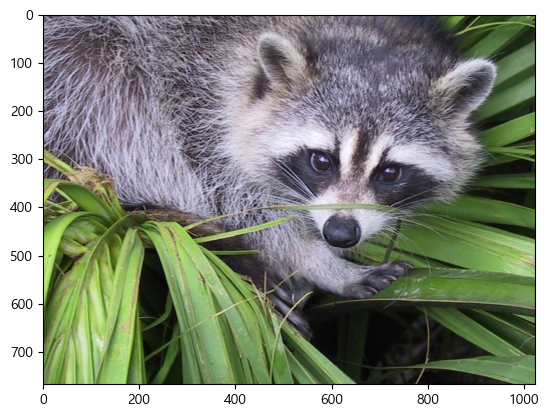

In [40]:
# 흑백 이미지 1개는 Matrix
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.images[0].shape) #(8,8) 행렬
plt.imshow(digits.images[0], cmap='gray')
plt.show()

# 컬러 이미지 1개는 Tensor
from scipy import misc
img_rgb = misc.face()
print(img_rgb.shape) #(768, 1024, 3)
plt.imshow(img_rgb)
plt.show()


In [45]:
ar = np.array([[1,2,3],[4,5,6]])
#print(ar)
# 2차원 배열에서는 결과가 같음
#print(ar.T) # 행과 열 전치
#print(ar.transpose())

#3차원의 경우는 순서를 결정해서 전치를 할 수 있음
ar = np.array([[[1,2],[3,4]],[[11,12],[13,14]],[[21,22],[23,24]]])
print(ar.T)
print(ar.transpose(2,1,0))
print(ar.transpose(1,0,2))            

[[[ 1 11 21]
  [ 3 13 23]]

 [[ 2 12 22]
  [ 4 14 24]]]
[[[ 1 11 21]
  [ 3 13 23]]

 [[ 2 12 22]
  [ 4 14 24]]]
[[[ 1  2]
  [11 12]
  [21 22]]

 [[ 3  4]
  [13 14]
  [23 24]]]


In [51]:
from scipy import sparse
# 대각 행렬(대각선으로만 1이 있는 행렬)을 만드는데 기준선은 하나 위로 설정
ar = np.eye(3,k=1) # k=1하면 하나 위로 올라감
print(ar)

# 희소 행렬로 변환
sp = sparse.csr_matrix(ar)
print(sp)

# 밀집 행렬로 변환
print(sp.toarray())

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]
  (0, 1)	1.0
  (1, 2)	1.0
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 0.]]


In [57]:
# 스칼라, 벡터, 행렬의 산술 연산

# 동일한 차원의 벡터 간의 산술 연산 - shape가 같아야 함
x = np.array([10,11,12,13,14])
y = np.array([20,13,22,11,23])
print(x.shape)
print(y.shape)
print(x+y)

# 다른 차원의 벡터 간의 산술 연산 - shape가 다르면 작은 쪽의 shape를 큰 쪽에 맞춰서 수행
print(x+5)
# 벡터와 행렬의 연산
# 벡터의 데이터 개수와 행렬의 열의 개수가 같아야 가능
ar = np.array([1,2,3])
matrix = np.array([[6,7,8],[16,17,18]])
print(ar.shape)
print(matrix.shape)
print(ar + matrix)

(5,)
(5,)
[30 24 34 24 37]
[15 16 17 18 19]
(3,)
(2, 3)
[[ 7  9 11]
 [17 19 21]]


In [62]:
# 벡터의 내적
x = np.array([1,2,3])
y = np.array([4,5,6])
print(np.dot(x,y)) # 일차원 배열은 전치를 하지 않아도 내적 계산 가능
print(x @ y)
print(x.T @ y) # 벡터의 내적은 행과 열의 개수가 크로스 방향으로 같을 때 가능

x = np.array([[1],[2],[3]])
y = np.array([[4],[5],[6]])
# print(np.dot(x,y)) # 오류발생, 이차원 배열은 내적을 구할 때 행과 열의 수를 맞추어야 가능
print(np.dot(x.T,y))



32
32
32
[[32]]


In [67]:
score = np.array([90,70,88])
# 단순 평균
print(score.mean())
# 학점이 3,2,3 인 경우
# 가중 평균 구하기
su = np.array([3,2,3])
print(score @ su / 8)

82.66666666666667
84.25


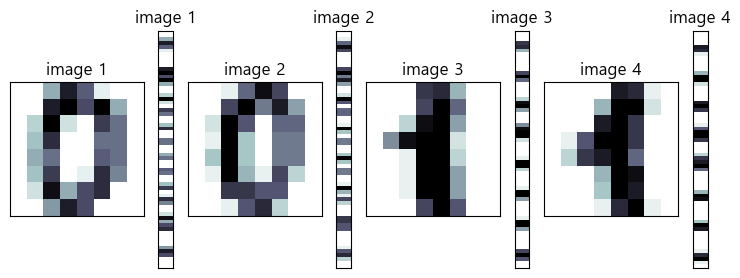

In [79]:
# 이미지의 유사도 계산
from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec

digits = load_digits()
#print(digits)

# 이미지 가져오기

# 숫자 0 이미지
d1 = digits.images[0]
d2 = digits.images[10]

# 숫자 1 이미지
d3 = digits.images[1]
d4 = digits.images[11]

# print(d1.shape)  -> (8, 8)

# 이미지 데이터의 차원을 조정(2차원 이미지를 64-크기의 1차원 벡터로 펼치기)
v1 = d1.reshape(64,1)
v2 = d2.reshape(64,1)
v3 = d3.reshape(64,1)
v4 = d4.reshape(64,1)

plt.figure(figsize=(9,9))
# 뒷 배경 만들기
# GridSpec(nrows, ncols, height_ratios=None, width_ratios=None)
gs = gridspec.GridSpec(1,8,height_ratios=[1], width_ratios=[9,1,9,1,9,1,9,1])

for i in range(4) :
    plt.subplot(gs[2 * i])
    #원본 이미지 출력
    plt.imshow(eval("d" + str(i+1)),aspect=1,
              interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([]) # 축 없애기
    plt.yticks([]) # 축 없애기
    plt.title("image {}".format(i+1))
    plt.subplot(gs[ 2 * i + 1])
    plt.imshow(eval("v" + str(i + 1)), aspect=0.25,
              interpolation='nearest', cmap=plt.cm.bone_r)
    plt.grid(False)
    plt.xticks([]) # 축 없애기
    plt.yticks([]) # 축 없애기
    plt.title("image {}".format(i+1))


plt.show()


In [87]:
# 유사도 계산
print(v1.T @ v2) # 내적이 가장 큼
print(v1.T @ v3)
print(v1.T @ v4)
print("============")
print(v3.T @ v1)
print(v3.T @ v2)
#print(v3.T @ v3)
print(v3.T @ v4) # 내적이 가장 큼

# 문장의 유사도도 이런 방식으로 확인 가능


[[3064.]]
[[1866.]]
[[1883.]]
[[1866.]]
[[2421.]]
[[3661.]]


In [91]:
print(np.dot(d1, d2)) # 8 * 8 행렬의 곱셈 - 8 * 8 행렬

[[  0.  60. 448. 143.   1. 232. 224.   0.]
 [  0.  96. 908. 365.  65. 532. 362.   0.]
 [  0.  43. 577. 357. 115. 394. 202.   0.]
 [  0.  32. 460. 320. 120. 332. 156.   0.]
 [  0.  25. 423. 301. 129. 321. 129.   0.]
 [  0.  38. 512. 322. 114. 365. 167.   0.]
 [  0.  85. 678. 292.  28. 406. 294.   0.]
 [  0.  65. 464. 152.   0. 238. 238.   0.]]


In [92]:
ar = np.array([[1,2,3],[4,5,6],[7,8,9]])
i = np.eye(3)
print(ar @ i)

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [94]:
ar = np.array([[1,2,3],[4,5,6],[7,8,9]])
v = np.array([1,2,3])
print(ar @ v.T) # 1차원 벡터 v 는 전치를 안해도 계산 가능함

[14 32 50]


Text(0.5, 1.0, 'image 3')

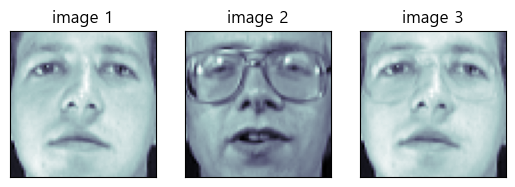

In [104]:
# 행렬과 벡터의 곱셈을 이용한 이미지 모핑(Morphing)
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
#print(faces)

f, ax = plt.subplots(1,3)

ax[0].imshow(faces.images[6], cmap=plt.cm.bone)
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_title("image 1")

ax[1].imshow(faces.images[10], cmap=plt.cm.bone)
ax[1].grid(False)
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[1].set_title("image 2")

new_face = 0.8 * faces.images[6] + 0.2 * faces.images[10]
ax[2].imshow(new_face, cmap=plt.cm.bone)
ax[2].grid(False)
ax[2].set_xticks([])
ax[2].set_yticks([])
ax[2].set_title("image 3")


In [108]:
# 잔차 제곱합 구하기

x = np.array([1,2,3])
A = np.arange(1,10).reshape(3,3)

# 잔차 제곱합
print(x.T @ A @ x)


228


In [110]:
vector = np.eye(3)
print(vector)
print(np.trace(vector))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
3.0


In [111]:
# 행렬식
mat = np.array([[1,2],[3,4]])
print(np.linalg.det(mat))

-2.0000000000000004


In [115]:
# 역행렬 구하기
a = np.array([[1,2],[3,4]])
inv = np.linalg.inv(a)
print(inv)
print(a @ inv) # 단위 행렬이 나오는지 확인 - 약간의 오차는 있을 수 있음

[[-2.   1. ]
 [ 1.5 -0.5]]
[[1.00e+00 1.11e-16]
 [0.00e+00 1.00e+00]]
